In [ ]:
# Izzy Zuffoletti
# Practice with TensorFlow Keras
  # Basic syntax and working w/ sklearn and tf 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [ ]:
# Randomly generate a dataset for regression w/ 15 predictors (3 of which are not redundant), 1 target variable, and some noise
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features = 15, n_informative = 3, n_targets=1, noise =0.05, random_state=1,effective_rank=3)

In [ ]:
# Preview of X
X = pd.DataFrame(X, columns= np.arange(1,16))
print(X)

           1         2         3   ...        13        14        15
0    0.019779  0.007869  0.018961  ... -0.015908  0.001384  0.014347
1    0.012644 -0.026546  0.024477  ... -0.019433  0.017278 -0.021958
2    0.016652 -0.004281  0.038163  ... -0.012068  0.018217 -0.007998
3   -0.013138 -0.008588  0.000375  ... -0.004471 -0.008838 -0.032432
4    0.006958 -0.019350 -0.017462  ... -0.013936 -0.013236 -0.008522
..        ...       ...       ...  ...       ...       ...       ...
995  0.014630 -0.006671  0.009082  ... -0.006932 -0.005658  0.034225
996  0.001518 -0.033528  0.001463  ...  0.000126  0.012362 -0.034961
997 -0.016071 -0.054813 -0.011889  ... -0.004865 -0.014253 -0.015128
998  0.025435 -0.013036  0.025753  ...  0.009618  0.022983  0.006685
999 -0.023551 -0.003014  0.011624  ... -0.016966  0.013261 -0.030150

[1000 rows x 15 columns]


In [ ]:
# Preview of y
y = pd.DataFrame(y, columns=["target"])
print(y)

       target
0    0.572423
1    2.152165
2    2.706655
3   -0.039921
4   -1.582311
..        ...
995 -1.146406
996 -1.152199
997 -1.464354
998  1.395633
999 -0.268479

[1000 rows x 1 columns]


(array([  4.,  19.,  76., 176., 200., 241., 185.,  70.,  21.,   8.]),
 array([-0.04811292, -0.03869708, -0.02928125, -0.01986541, -0.01044958,
        -0.00103375,  0.00838209,  0.01779792,  0.02721375,  0.03662959,
         0.04604542]),
 <a list of 10 Patch objects>)

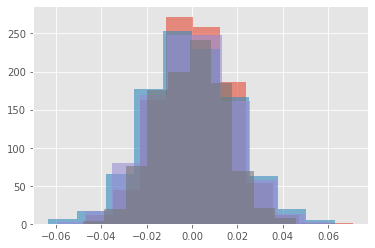

In [ ]:
# all features are normally distributed
  # here is just a small sample
plt.style.use("ggplot")
plt.hist(X.iloc[:,0],alpha=.6)
plt.hist(X.iloc[:,1],alpha=.6)
plt.hist(X.iloc[:,2],alpha=.6)
plt.hist(X.iloc[:,3],alpha=.6)

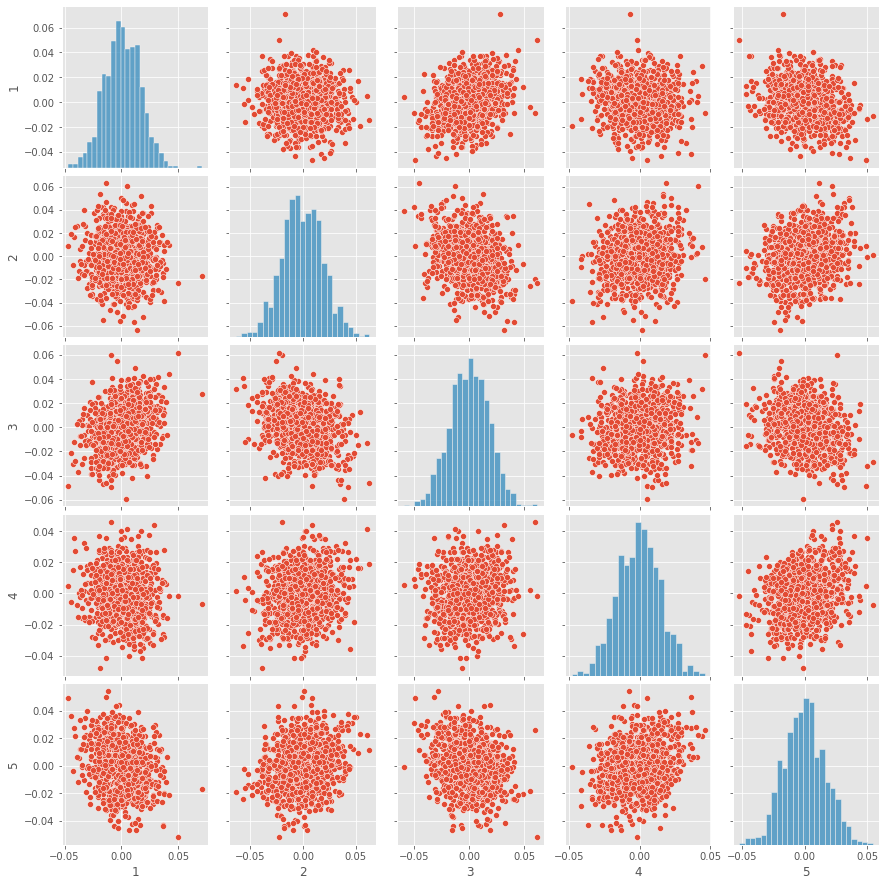

In [ ]:
# we do see some feature correlation in a pairplot of a sample of features
sns.pairplot(X.iloc[:,0:5])

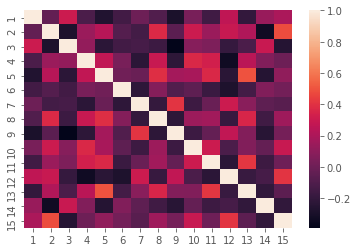

In [ ]:
# A heatmap confirms the correlation between some features, 
#but no correlation is >.7 and severe enough to cause confounding
sns.heatmap(X.corr())

#----------------------------------------------
#### Preparing Data
#----------------------------------------------

In [ ]:
# Test train split w/ 30% test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# Scale our x data (NOT y data in order to prevent bias by looking at y data before regression)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

#=========================================================
## Eliminating Correlated Features
#=========================================================


### This function calculates the F score for each feature. This is a measure of relative importance for determining the y value

##### these results can be used for selecting features by thresholding the F score, or choosing the top "k" results. I use the K Best results in this example.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature 1: 1.734567
Feature 2: 1.814171
Feature 3: 235.890453
Feature 4: 80.288282
Feature 5: 543.532340
Feature 6: 53.816190
Feature 7: 30.483955
Feature 8: 33.833753
Feature 9: 29.666842
Feature 10: 27.083588
Feature 11: 61.132792
Feature 12: 169.762369
Feature 13: 61.583535
Feature 14: 1.441404
Feature 15: 6.388139


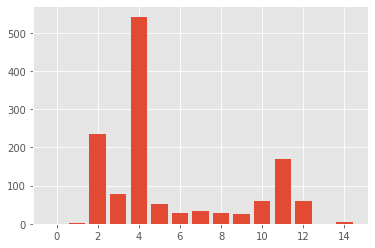

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

def feature_fscores(X_train, y_train, X_test):
  
  fs = SelectKBest(score_func=f_regression, k='all')
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = feature_fscores(X_train, y_train, X_test)
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i+1, fs.scores_[i]+1))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# Selecting K Best features
    # Features 2, 4, and 11 are most significant, but only 1, 13, and 14 seem completely insignificant
    # a grid search is a better option to choose features, but I am using all based on the bar chart for simplicity

In [ ]:
# ****Notebook Goal-> make a basic feed-forward model & add layers

    # Sequential() is an object that groups a linear stack of layers into a model
    # the Dense() object creates a regular densely connected Neural Net layer
    # AKA piece together dense layers with the structure of a sequential model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# =================================================================
#             Instantiating the Model 
# =================================================================
  # Using common notation of L as output layer, and increasing in number working backwards
  # Parameters of dense are number of nodes and activation function
  # Used rectified linear unit (ReLU)
L = Dense(1)
L1 = Dense(4, activation='relu')
L2 = Dense(4, activation='relu')
L3 = Dense(4, activation='relu')

# Connecting layers in sequential model by passing list of layers to Sequential
model = Sequential([L3, L2, L1, L])

This is a "deep" neural net because it has more than 2 hidden layers

In [ ]:
# ------------------ Another method  ------------------
    # Make model then add layers one at a time
    # More commonly used because code is easier to adapt

      # model = Sequential
      # model.add(L2)
      # model.add(L1)
      # model.add(L)

# ====================================================
##                                           Compiling & Fitting a Model 
# ====================================================

In [ ]:

# Compiling
# Sets some parameters for how the model will learn
    # how is cost calculated? how are weights adjusted?
    # methods here use partial derivatives to relate cost to weights

# optimizier-> common choices are adam (adaptive gradient descent) and rmsprop
# loss-> depends on kind of problem (regression or classification? mutually exclusive classes?)
    # 'mse' is good for regression in this case

model.compile(optimizer = 'rmsprop', loss = 'mse')

In [ ]:
# Fitting
  # epochs are how many times the model will pass over the dataset
  # verbose -> how many updates do you want while displaying?


# Adding a callback fxn to stop model from running longer than needed
  # AKA this stops training when cost stops decreasing
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(monitor ="loss",  
                                        mode ="min", patience = 5,  
                                        restore_best_weights = True) 
model.fit(x=X_train, y = y_train, epochs = 500, verbose=1, callbacks=[earlystopping])

Epoch 1/500
22/22 [==============================] - 1s 1ms/step - loss: 3.5376
Epoch 2/500
22/22 [==============================] - 0s 1ms/step - loss: 3.1959
Epoch 3/500
22/22 [==============================] - 0s 1ms/step - loss: 3.8141
Epoch 4/500
22/22 [==============================] - 0s 1ms/step - loss: 3.3522
Epoch 5/500
22/22 [==============================] - 0s 1ms/step - loss: 3.3361
Epoch 6/500
22/22 [==============================] - 0s 1ms/step - loss: 3.4092
Epoch 7/500
22/22 [==============================] - 0s 1ms/step - loss: 3.1878
Epoch 8/500
22/22 [==============================] - 0s 1ms/step - loss: 3.2924
Epoch 9/500
22/22 [==============================] - 0s 1ms/step - loss: 3.1322
Epoch 10/500
22/22 [==============================] - 0s 1ms/step - loss: 3.3140
Epoch 11/500
22/22 [==============================] - 0s 2ms/step - loss: 3.1696
Epoch 12/500
22/22 [==============================] - 0s 1ms/step - loss: 2.9982
Epoch 13/500
22/22 [=================

In [ ]:
# Our callback stopped model training 232 epochs early :^)
# Our model has a patience of 5 (allows 5 epochs of increasing loss before stopping)

[Text(0, 0.5, 'Loss (mse)'), Text(0.5, 0, 'epochs')]

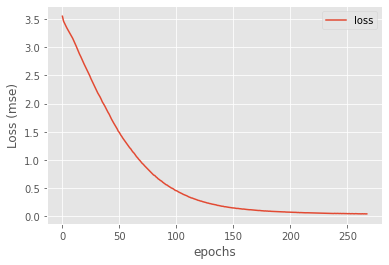

In [ ]:
# Decrease in loss with epochs
loss_df = pd.DataFrame(model.history.history)
ax = loss_df.plot()
ax.set(xlabel="epochs",ylabel="Loss (mse)")

# =========================================================
##                   Model Evaluation
# =========================================================

In [ ]:
# 1.   Using the built-in evaluate attribute of the model object
    # note that we selected MSE during model optimization, so this returns MSE
mse = model.evaluate(X_test, y_test, verbose = 0)
print(mse)

0.0438472181558609


In [ ]:
# 2.    Calculating our own metrics by getting the model's predictions

test_predictions = model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(300,))
pred_df = pd.DataFrame(y_test.values,columns=["True Y Test"])
pred_df = pd.concat([pred_df,test_predictions.rename("Predicted Y Test")],axis=1)

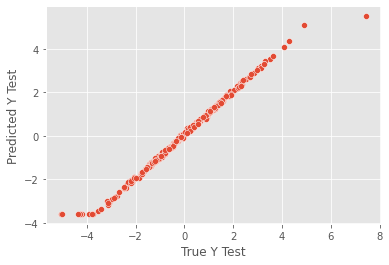

In [ ]:
# Prediction vs true value is linear -> model predictions are good 
sns.scatterplot(x='True Y Test', y ="Predicted Y Test", data = pred_df)

In [ ]:
# A few metrics after retrieving model predictions
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(pred_df["True Y Test"], pred_df["Predicted Y Test"])
mse = mean_squared_error(pred_df["True Y Test"], pred_df["Predicted Y Test"])
rmse = mse ** 0.5
print("mae", mae)
print("mse", mse)
print("rmse", rmse)
y.describe()

# With context of the standard deviation of the y dataset, an MSE of 0.04 is good

mae 0.10943474627027105
mse 0.04384722139947579
rmse 0.20939728126094614


,target
count,1000.000000
mean,-0.057360
std,1.847264
min,-6.386684
25%,-1.288480
50%,-0.054262
75%,1.264352
max,7.424376


In [ ]:
# Giving model a new data point to evaluate

# new_point = [[1,2,3,4, ......]]
# new_point = scaler.transform(new_point)
# model.predict(new_point)

## Saving the Model

In [ ]:
# Saving a model
from tensorflow.keras.models import load_model 
model.save("my_model.h5")
# Loading an existing model
imported_model = load_model("my_model.h5")